In [508]:
import sys

most_amount_of_items_removed_per_set = sys.maxsize
#most_amount_of_items_removed_per_set = 7


In [509]:

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import nltk
import ssl
import os
import re
import random
from enum import Enum

img_folder = '../datasets/raw/Re-PolyVore'

ignore_files = ['.DS_Store']

categorys = list(filter(lambda x: not x in ignore_files, list(os.listdir(img_folder))))
categorys

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

#nltk.download()  # uncomment this line if you execute this notebook the first time, afterwards you can comment it again

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [510]:
img_folder = '../datasets/raw/Re-PolyVore'

ignore_files = ['.DS_Store']

categorys = list(filter(lambda x: not x in ignore_files, list(os.listdir(img_folder))))
category_dict = {}

set_ids = []
for category in categorys:
    for image in os.listdir(f'{img_folder}/{category}'):
        set_name = re.sub(r'_\d{1,5}.jpg', '', image)
        set_and_img_index = re.sub(r'.jpg', '', image)
        set_ids.append(set_name)

        category_dict[f'{set_and_img_index}'] = category

set_ids = list(set(set_ids))
print(f'Number of sets in the cleaned dataset: {len(set_ids)}')

Number of sets in the cleaned dataset: 31612


# Approach 2 - use cleaned dataset

In [511]:
df = pd.DataFrame()
df_train = pd.read_json('../datasets/raw/polyvore-dataset-master/polyvore/train_no_dup.json')
df_test = pd.read_json('../datasets/raw/polyvore-dataset-master/polyvore/test_no_dup.json')
df_valid = pd.read_json('../datasets/raw/polyvore-dataset-master/polyvore/valid_no_dup.json')

print(f'train dataset number of sets: {df_train.shape[0]}')
print(f'test dataset number of sets: {df_test.shape[0]}')
print(f'valid dataset number of sets: {df_valid.shape[0]}')
print('-' * 100)


def get_number_of_sets_in_dataframe(df):
    return len(list(set(df['set_id'])))


df = pd.concat([df_train, df_test, df_valid])

merged_dataset_number_of_sets = df.shape[0]

print(f'merged dataset number of sets: {merged_dataset_number_of_sets}')

df = df.rename(columns={
    'image': 'outfitImage',
    'likes': 'outfitLikes',
    'index': 'clothingItemIndex',
    'views': 'outfitViews',
    'name': 'outfitName',
    'desc': 'outfitDesc'
})

df = df.explode('items')
df["items"] = df['items'].apply(lambda x: dict(x))
df.drop(columns=['items'])

df_normalized = pd.json_normalize(df['items'])
df_normalized.rename(columns={
    'index': 'clothingItemIndex',
    'likes': 'clothingItemLikes',
    'price': 'clothingItemPrice',
    'categoryid': 'clothingItemCategoryId',
    'image': 'clothingItemImage',
    'name': 'clothingItemName'
}, inplace=True)

df.reset_index(inplace=True, drop=True)
df_normalized.reset_index(inplace=True, drop=True)

df = pd.concat([df, df_normalized], axis=1)

df.drop(columns=['clothingItemImage', 'outfitImage', 'set_url', 'items'], inplace=True)

df

train dataset number of sets: 17316
test dataset number of sets: 3076
valid dataset number of sets: 1497
----------------------------------------------------------------------------------------------------
merged dataset number of sets: 21889


,outfitName,outfitViews,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
1,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,2,luxe double zip hooded jacket,150.0,2250,25
2,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,3,citizens humanity high rise rocket hem jean,248.0,2437,27
3,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,4,suede tie short boots,37.0,2,261
4,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,5,cloth travel school backpack,22.0,2,259
...,...,...,...,...,...,...,...,...,...,...,...
142475,Gravity Falls: Wendy Corduroy,519,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,6,shearling sheepskin aviator bomber fur hat pea...,-1.0,2,55
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46
142477,Apples of Gold Jewelry - Black-Akoya-Pearl,553,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,2,pearl classic earrings,375.0,15,64
142478,Apples of Gold Jewelry - Black-Akoya-Pearl,553,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,3,oval white opal ring,425.0,9,65


## Remove Items which do not have images in the cleaned dataset and add types

In [512]:
types = []

for index, row in df.iterrows():
    lookup_key = f'{str(row["set_id"])}_{str(row["clothingItemIndex"])}'

    if lookup_key in category_dict:
        types.append(category_dict[lookup_key])
    else:
        types.append(None)

types

['top',
 None,
 None,
 None,
 None,
 None,
 None,
 'top',
 'pants',
 None,
 None,
 None,
 None,
 None,
 None,
 'top',
 None,
 'pants',
 None,
 'bag',
 'hats',
 'top',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'skirt',
 'shoes',
 'earrings',
 'necklace',
 None,
 None,
 'top',
 None,
 'shoes',
 'bag',
 'necklace',
 None,
 'top',
 'skirt',
 'shoes',
 None,
 None,
 None,
 None,
 'top',
 'skirt',
 'shoes',
 'bag',
 None,
 None,
 'dress',
 'top',
 'outwear',
 'shoes',
 'bag',
 'neckwear',
 None,
 None,
 'pants',
 'shoes',
 None,
 None,
 None,
 'bag',
 'dress',
 None,
 'shoes',
 'bag',
 None,
 None,
 None,
 None,
 'dress',
 None,
 'bag',
 'watches',
 None,
 'rings',
 None,
 'outwear',
 'top',
 'pants',
 None,
 'bag',
 'necklace',
 'dress',
 'shoes',
 'bag',
 None,
 None,
 None,
 None,
 None,
 'shoes',
 'bag',
 None,
 'eyewear',
 None,
 None,
 'top',
 'skirt',
 None,
 'bag',
 'hats',
 None,
 'outwear',
 None,
 None,
 'bag',
 'necklace',
 None,
 'pants',
 'shoes',
 'eyewea

In [513]:
df.insert(2, "type", types, True)
df

,outfitName,outfitViews,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,top,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
1,Casual,8743,None,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,2,luxe double zip hooded jacket,150.0,2250,25
2,Casual,8743,None,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,3,citizens humanity high rise rocket hem jean,248.0,2437,27
3,Casual,8743,None,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,4,suede tie short boots,37.0,2,261
4,Casual,8743,None,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,5,cloth travel school backpack,22.0,2,259
...,...,...,...,...,...,...,...,...,...,...,...,...
142475,Gravity Falls: Wendy Corduroy,519,hats,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,6,shearling sheepskin aviator bomber fur hat pea...,-1.0,2,55
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,shoes,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46
142477,Apples of Gold Jewelry - Black-Akoya-Pearl,553,earrings,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,2,pearl classic earrings,375.0,15,64
142478,Apples of Gold Jewelry - Black-Akoya-Pearl,553,None,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,3,oval white opal ring,425.0,9,65


In [514]:
df_non_type_items_removed = df[df["type"].isna() == False]

number_of_sets_with_non_type_items_removed = get_number_of_sets_in_dataframe(df_non_type_items_removed)

print(f'original number of sets: {merged_dataset_number_of_sets}')
print(f'number of sets with non type items removed: {number_of_sets_with_non_type_items_removed}')
print(
    f'lost sets (only consisted out of items which have no category): {merged_dataset_number_of_sets - number_of_sets_with_non_type_items_removed}'
)
df_non_type_items_removed

original number of sets: 21889
number of sets with non type items removed: 20546
lost sets (only consisted out of items which have no category): 1343


,outfitName,outfitViews,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,top,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
7,Being a Vans shoe model with Luke. Idk about t...,188,top,9,Two years,120161271,A fashion look from April 2014 featuring destr...,1,nirvana distressed t-shirt,10.0,1290,21
8,Being a Vans shoe model with Luke. Idk about t...,188,pants,9,Two years,120161271,A fashion look from April 2014 featuring destr...,2,rag bone rock w/ black skinny jeans,235.0,17406,237
15,These Chanel bags is a bad habit .x,562,top,32,Two years,143656996,12.19.14,1,monki singlet,16.0,20094,104
17,These Chanel bags is a bad habit .x,562,pants,32,Two years,143656996,12.19.14,3,topshop moto joni high rise skinny jeans,65.0,23324,237
...,...,...,...,...,...,...,...,...,...,...,...,...
142472,Gravity Falls: Wendy Corduroy,519,pants,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,3,closed lizzy mid-rise skinny jeans,150.0,19,237
142473,Gravity Falls: Wendy Corduroy,519,shoes,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,4,moto boots,135.0,4,42
142475,Gravity Falls: Wendy Corduroy,519,hats,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,6,shearling sheepskin aviator bomber fur hat pea...,-1.0,2,55
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,shoes,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46


## Remove sets, from which at least defined number of items were removed

In [515]:
removed_items = pd.DataFrame(
    df[df['set_id'].isin(df_non_type_items_removed['set_id'])]['set_id'].value_counts()
    -
    df_non_type_items_removed['set_id'].value_counts()
)

set_ids_from_which_a_acceptable_amount_of_items_were_removed = list(
    set(removed_items[removed_items['count'] <= most_amount_of_items_removed_per_set]['count'].index)
)

df_only_sets_from_which_a_acceptable_amount_of_items_were_removed = df_non_type_items_removed[
    df_non_type_items_removed['set_id'].isin(set_ids_from_which_a_acceptable_amount_of_items_were_removed)
]

number_of_set_sets_from_which_a_acceptable_amount_of_items_were_removed = get_number_of_sets_in_dataframe(
    df_only_sets_from_which_a_acceptable_amount_of_items_were_removed
)

#
print(f'only assigned types number of sets: {number_of_sets_with_non_type_items_removed}')
print(
    f'number of set sets from which a acceptable amount of items were removed (max {most_amount_of_items_removed_per_set} items): {number_of_set_sets_from_which_a_acceptable_amount_of_items_were_removed}')
print(
    f'loss: {number_of_sets_with_non_type_items_removed - number_of_set_sets_from_which_a_acceptable_amount_of_items_were_removed}')

df_only_sets_from_which_a_acceptable_amount_of_items_were_removed

only assigned types number of sets: 20546
number of set sets from which a acceptable amount of items were removed (max 9223372036854775807 items): 20546
loss: 0


,outfitName,outfitViews,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,top,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
7,Being a Vans shoe model with Luke. Idk about t...,188,top,9,Two years,120161271,A fashion look from April 2014 featuring destr...,1,nirvana distressed t-shirt,10.0,1290,21
8,Being a Vans shoe model with Luke. Idk about t...,188,pants,9,Two years,120161271,A fashion look from April 2014 featuring destr...,2,rag bone rock w/ black skinny jeans,235.0,17406,237
15,These Chanel bags is a bad habit .x,562,top,32,Two years,143656996,12.19.14,1,monki singlet,16.0,20094,104
17,These Chanel bags is a bad habit .x,562,pants,32,Two years,143656996,12.19.14,3,topshop moto joni high rise skinny jeans,65.0,23324,237
...,...,...,...,...,...,...,...,...,...,...,...,...
142472,Gravity Falls: Wendy Corduroy,519,pants,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,3,closed lizzy mid-rise skinny jeans,150.0,19,237
142473,Gravity Falls: Wendy Corduroy,519,shoes,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,4,moto boots,135.0,4,42
142475,Gravity Falls: Wendy Corduroy,519,hats,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,6,shearling sheepskin aviator bomber fur hat pea...,-1.0,2,55
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,shoes,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46


In [516]:
removed_items.sort_values(by='count', ascending=False)

,count
set_id,
173415053,7
216930022,7
192968536,7
171880252,7
171885684,7
...,...
193213668,0
193212010,0
216604289,0


## Remove Sets which have items of the same type

In [517]:
set_ids_with_duplicated_types = list(
    set(df_only_sets_from_which_a_acceptable_amount_of_items_were_removed[
            df_only_sets_from_which_a_acceptable_amount_of_items_were_removed.duplicated(
                subset=['set_id', 'type'])]['set_id'])
)

df_no_item_type_duplicates = df_only_sets_from_which_a_acceptable_amount_of_items_were_removed[
    ~df_only_sets_from_which_a_acceptable_amount_of_items_were_removed['set_id'].isin(set_ids_with_duplicated_types)
]

number_of_sets_without_item_type_duplicates = get_number_of_sets_in_dataframe(df_no_item_type_duplicates)

print(
    f'number of set sets from which a acceptable amount of items were removed (max {most_amount_of_items_removed_per_set} items): {number_of_set_sets_from_which_a_acceptable_amount_of_items_were_removed}'
)

print(f'sets with items of same type: {len(set_ids_with_duplicated_types)}')
print(f'number of sets without item type duplicates: {number_of_sets_without_item_type_duplicates}')
print(f'loss: {len(set_ids_with_duplicated_types)}')

df_no_item_type_duplicates

number of set sets from which a acceptable amount of items were removed (max 9223372036854775807 items): 20546
sets with items of same type: 1563
number of sets without item type duplicates: 18983
loss: 1563


,outfitName,outfitViews,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,top,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
7,Being a Vans shoe model with Luke. Idk about t...,188,top,9,Two years,120161271,A fashion look from April 2014 featuring destr...,1,nirvana distressed t-shirt,10.0,1290,21
8,Being a Vans shoe model with Luke. Idk about t...,188,pants,9,Two years,120161271,A fashion look from April 2014 featuring destr...,2,rag bone rock w/ black skinny jeans,235.0,17406,237
15,These Chanel bags is a bad habit .x,562,top,32,Two years,143656996,12.19.14,1,monki singlet,16.0,20094,104
17,These Chanel bags is a bad habit .x,562,pants,32,Two years,143656996,12.19.14,3,topshop moto joni high rise skinny jeans,65.0,23324,237
...,...,...,...,...,...,...,...,...,...,...,...,...
142462,Army,281,shoes,30,One year,187953065,A fashion look from January 2016 by catherine-...,4,ralph lauren collection canvas sandals,230.0,831,46
142463,Army,281,bag,30,One year,187953065,A fashion look from January 2016 by catherine-...,5,alexander mcqueen hunter green black mini leat...,1010.0,16,37
142464,Army,281,necklace,30,One year,187953065,A fashion look from January 2016 by catherine-...,6,forever faux pearl rhinestone statement necklace,18.0,66,62
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,shoes,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46


In [518]:
df_no_item_type_duplicates['set_id'].value_counts()

set_id
213611661    8
200658282    8
124323995    8
169398378    8
138699527    8
            ..
158395131    1
205078257    1
138306698    1
214545753    1
214181831    1
Name: count, Length: 18983, dtype: int64

In [519]:
# only_include_outfits_with_at_least_number_of_items = 4
# set_ids_with_more_than_specified_number_of_items = pd.DataFrame(df_no_item_type_duplicates['set_id'].value_counts())
# set_ids_with_more_than_one_item = set_ids_with_more_than_specified_number_of_items[
#     set_ids_with_more_than_specified_number_of_items[
#         'count'] > only_include_outfits_with_at_least_number_of_items].index
#
# df_sets_with_minimum_number_of_items = df_no_item_type_duplicates[
#     df_no_item_type_duplicates['set_id'].isin(set_ids_with_more_than_one_item)]
#
# number_of_sets_that_have_minimum_number_of_items = get_number_of_sets_in_dataframe(df_sets_with_minimum_number_of_items)
#
# print(f'number of sets without item type duplicates: {number_of_sets_without_item_type_duplicates}')
# print(
#     f'number of sets with minimum number of items (min {only_include_outfits_with_at_least_number_of_items}): {number_of_sets_that_have_minimum_number_of_items}')
# print(f'loss: {number_of_sets_without_item_type_duplicates - number_of_sets_that_have_minimum_number_of_items}')


In [520]:
# df_sets_with_minimum_number_of_items["type"].value_counts()

In [521]:




#display_outfit(df_sets_with_minimum_number_of_items)


class WearType(Enum):
    accessoire = 1
    innerWear = 2
    outerWear = 3
    bottomWear = 4
    shoes = 5


wear_types = []

wear_type_mapping = {
    'bag': WearType.accessoire,
    'brooch': WearType.accessoire,
    'earrings': WearType.accessoire,
    'gloves': WearType.accessoire,
    'hats': WearType.accessoire,
    'legwear': WearType.bottomWear,
    'neckwear': WearType.accessoire,
    'pants': WearType.bottomWear,
    'shoes': WearType.shoes,
    'top': WearType.innerWear,
    'bracelet': WearType.accessoire,
    'dress': None,
    'eyewear': WearType.accessoire,
    'hairwear': WearType.accessoire,
    'jumpsuit': None,
    'necklace': WearType.accessoire,
    'outwear': WearType.outerWear,
    'rings': WearType.accessoire,
    'skirt': WearType.bottomWear,
    'watches': WearType.accessoire
}

for index, item in df_no_item_type_duplicates.iterrows():
    item_type = item['type']
    if item_type in wear_type_mapping:
        wear_types.append(wear_type_mapping[item_type])
    else:
        wear_types.append(None)

df_with_wear_types = df_no_item_type_duplicates.copy(True)
df_with_wear_types.insert(2, "wearType", wear_types, True)
df_with_wear_types

,outfitName,outfitViews,wearType,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,WearType.innerWear,top,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
7,Being a Vans shoe model with Luke. Idk about t...,188,WearType.innerWear,top,9,Two years,120161271,A fashion look from April 2014 featuring destr...,1,nirvana distressed t-shirt,10.0,1290,21
8,Being a Vans shoe model with Luke. Idk about t...,188,WearType.bottomWear,pants,9,Two years,120161271,A fashion look from April 2014 featuring destr...,2,rag bone rock w/ black skinny jeans,235.0,17406,237
15,These Chanel bags is a bad habit .x,562,WearType.innerWear,top,32,Two years,143656996,12.19.14,1,monki singlet,16.0,20094,104
17,These Chanel bags is a bad habit .x,562,WearType.bottomWear,pants,32,Two years,143656996,12.19.14,3,topshop moto joni high rise skinny jeans,65.0,23324,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142462,Army,281,WearType.shoes,shoes,30,One year,187953065,A fashion look from January 2016 by catherine-...,4,ralph lauren collection canvas sandals,230.0,831,46
142463,Army,281,WearType.accessoire,bag,30,One year,187953065,A fashion look from January 2016 by catherine-...,5,alexander mcqueen hunter green black mini leat...,1010.0,16,37
142464,Army,281,WearType.accessoire,necklace,30,One year,187953065,A fashion look from January 2016 by catherine-...,6,forever faux pearl rhinestone statement necklace,18.0,66,62
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,WearType.shoes,shoes,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46


In [522]:
def set_contains_items_for_valid_outfit(set_id, df):
    items = df[df['set_id'] == set_id]

    has_inner_wear = False
    has_outer_wear = False
    has_shoes = False
    has_bottom_wear = False

    types = pd.DataFrame([], columns=['wearType'])

    for index, item in items.iterrows():
        item_wear_type = item["wearType"]
        if item_wear_type is None:
            return False

        if (item_wear_type == WearType.innerWear) and (not has_inner_wear):
            has_inner_wear = True
            types = pd.concat([types, pd.DataFrame([{'wearType': item_wear_type}])], ignore_index=True)

        if (item_wear_type == WearType.outerWear) and (not has_outer_wear):
            has_outer_wear = True
            types = pd.concat([types, pd.DataFrame([{'wearType': item_wear_type}])], ignore_index=True)

        if (item_wear_type == WearType.shoes) and (not has_shoes):
            has_shoes = True
            types = pd.concat([types, pd.DataFrame([{'wearType': item_wear_type}])], ignore_index=True)

        if (item_wear_type == WearType.bottomWear) and (not has_bottom_wear):
            has_bottom_wear = True
            types = pd.concat([types, pd.DataFrame([{'wearType': item_wear_type}])], ignore_index=True)

    if types.shape[0] > 0:
        counts = pd.DataFrame(types['wearType'].value_counts())
        if counts[counts['count'] > 1].shape[0] > 1:
            print('removed set')
            return False

    # if (has_outer_wear and has_shoes and has_bottom_wear) and (not has_inner_wear):
    #     return False
    #
    # if (has_inner_wear and has_shoes and has_bottom_wear) and (not has_outer_wear):
    #     return True
    # return has_inner_wear and has_inner_wear and has_shoes and has_bottom_wear

    if (has_outer_wear and has_bottom_wear) and (not has_inner_wear):
        return False

    if (has_inner_wear and has_bottom_wear) and (not has_outer_wear):
        return True

    return has_inner_wear and has_inner_wear and has_bottom_wear


set_ids_which_are_valid_outfits = []
for set_id in list(set(df_with_wear_types['set_id'])):
    if set_contains_items_for_valid_outfit(set_id, df_with_wear_types):
        set_ids_which_are_valid_outfits.append(set_id)

df_only_valid_outfits = df_with_wear_types[df_with_wear_types["set_id"].isin(set_ids_which_are_valid_outfits)]

number_of_sets_which_are_valid_outfits = get_number_of_sets_in_dataframe(df_only_valid_outfits)
print(f'number of sets which are valid outfits: {number_of_sets_which_are_valid_outfits}')

number of sets which are valid outfits: 6748


random sample of 20 outfits from a total of 6748


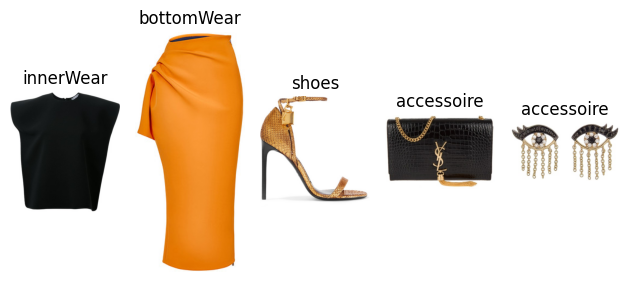

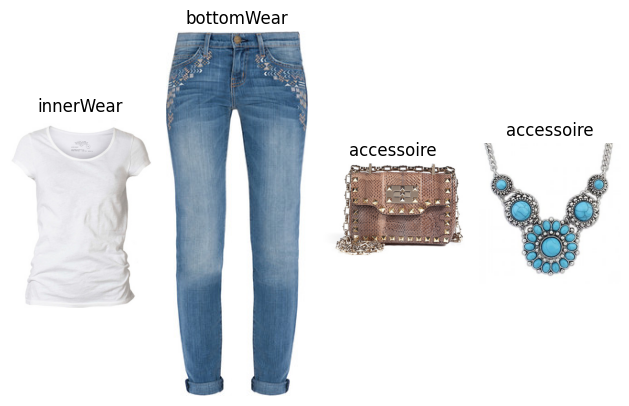

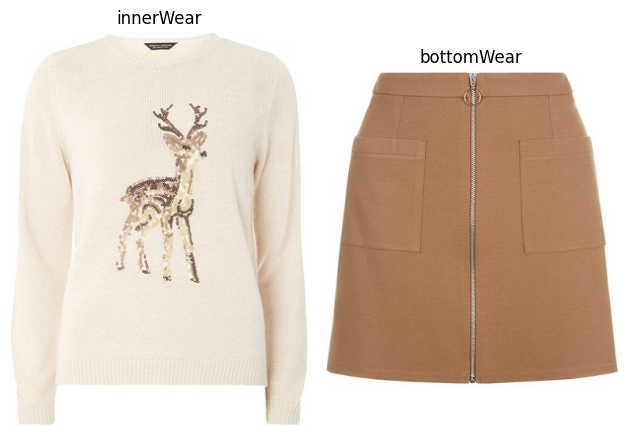

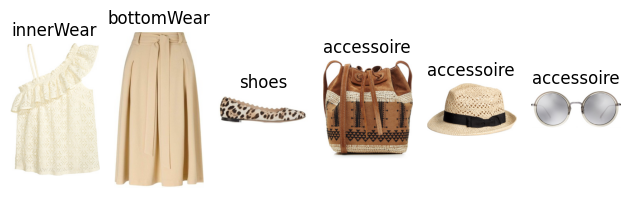

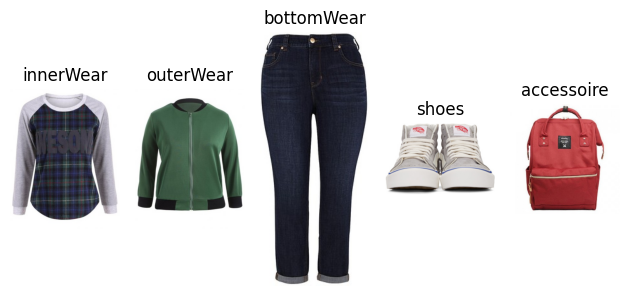

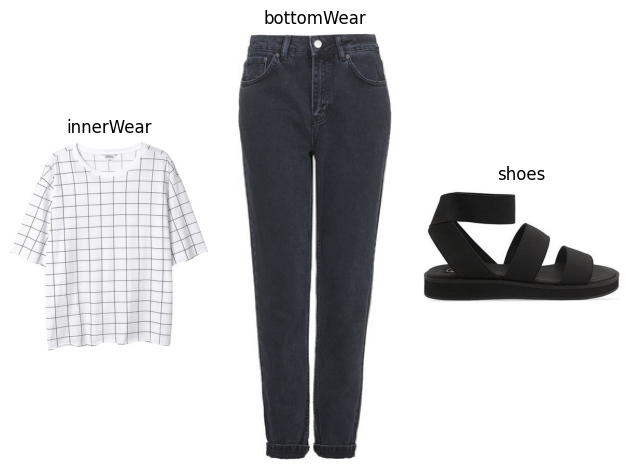

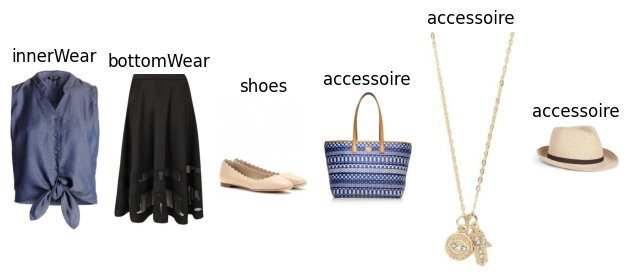

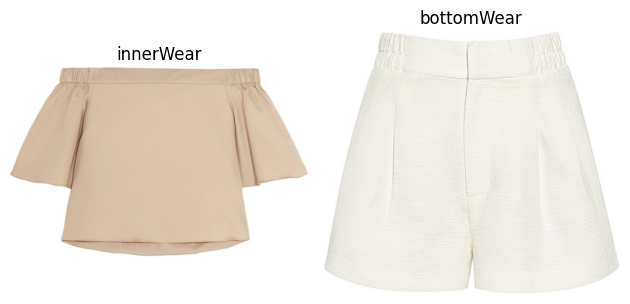

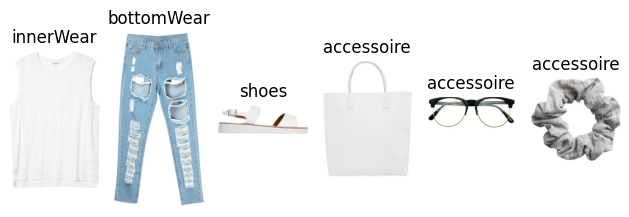

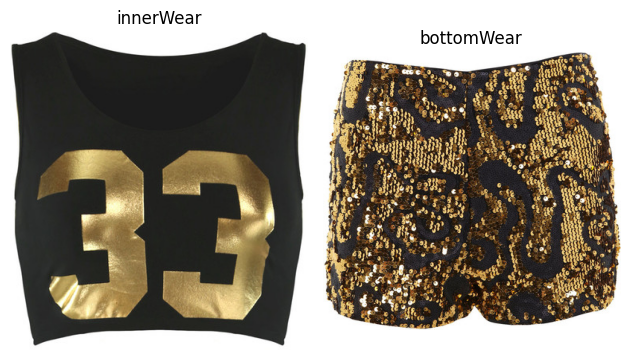

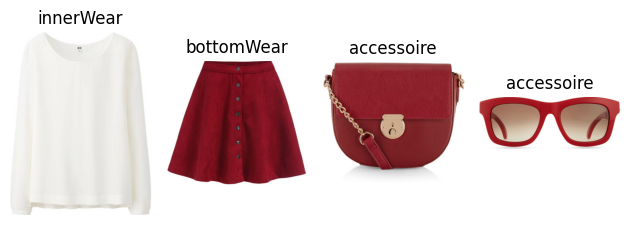

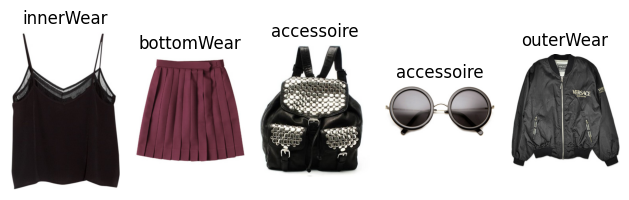

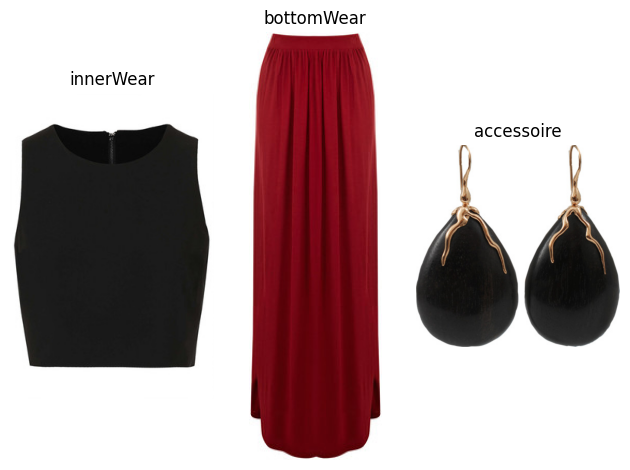

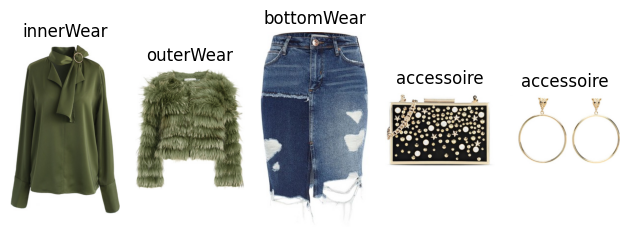

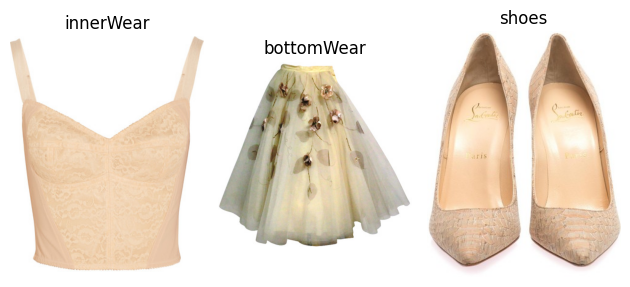

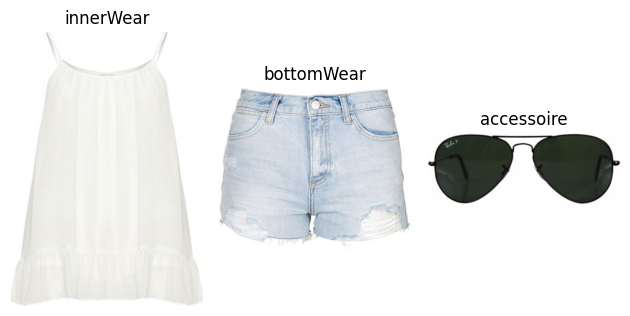

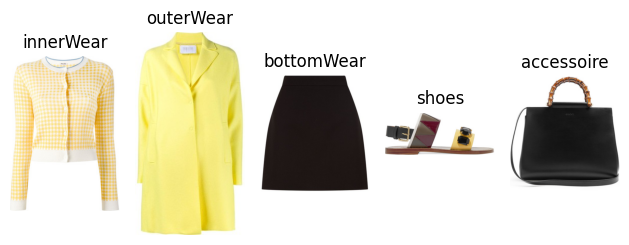

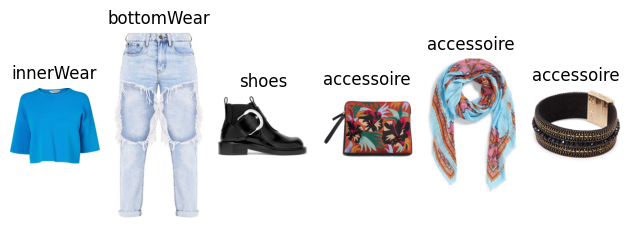

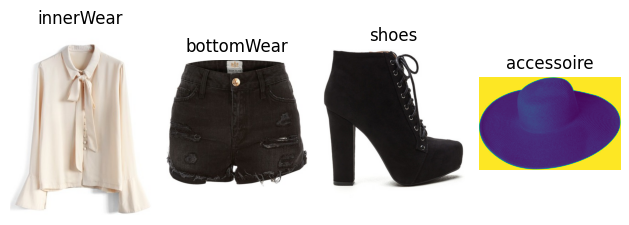

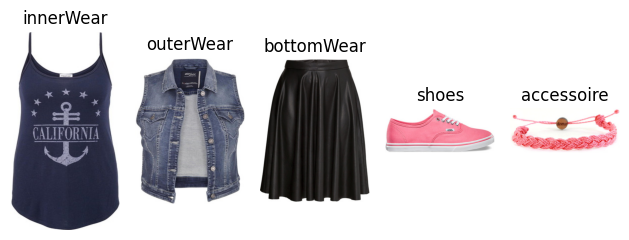

In [523]:
def display_outfit(df, n=20):
    all_cleaned_set_ids = list(set(df['set_id']))
    set_ids = random.sample(all_cleaned_set_ids, n)
    outfit_count = 0
    print(f'random sample of {n} outfits from a total of {len(all_cleaned_set_ids)}')

    for set_id in set_ids:

        items = df[df['set_id'] == set_id]

        img_index = 0
        f, axarr = plt.subplots(1, len(items))

        for index, item in items.iterrows():
            img = mpimg.imread(
                f'../datasets/raw/images/{str(set_id)}/{str(item["clothingItemIndex"])}.jpg'
            )
            ax = axarr[img_index]

            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            # X AXIS -BORDER
            ax.spines['bottom'].set_visible(False)
            # BLUE
            ax.set_xticklabels([])
            # RED
            ax.set_xticks([])
            # RED AND BLUE TOGETHER
            ax.axes.get_xaxis().set_visible(False)

            # Y AXIS -BORDER
            ax.spines['left'].set_visible(False)
            # YELLOW
            ax.set_yticklabels([])
            # GREEN
            ax.set_yticks([])
            # YELLOW AND GREEN TOGHETHER
            ax.axes.get_yaxis().set_visible(False)

            ax.set_title(item["wearType"].name)

            ax.imshow(img)

            img_index += 1

        outfit_count += 1
        f.tight_layout()

        if outfit_count >= n:
            break


display_outfit(df_only_valid_outfits)

In [496]:
df_only_valid_outfits

,outfitName,outfitViews,wearType,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
43,the people i choose never choose me and my hea...,1580,WearType.innerWear,top,395,9 days,216470135,A fashion look from February 2017 by exco feat...,1,isabel marant alpaca blend jumper,615.0,268,19
44,the people i choose never choose me and my hea...,1580,WearType.bottomWear,skirt,395,9 days,216470135,A fashion look from February 2017 by exco feat...,2,yoins light blue gradient color hole denim skirt,22.0,331,9
45,the people i choose never choose me and my hea...,1580,WearType.shoes,shoes,395,9 days,216470135,A fashion look from February 2017 by exco feat...,3,alice light blue shoes flats leather sandals,189.0,2634,41
50,Be happy!,591,WearType.innerWear,top,233,14 days,216220312,A fashion look from February 2017 by rasa-j fe...,1,oasis shadow bird knit pink,47.0,4874,19
51,Be happy!,591,WearType.bottomWear,skirt,233,14 days,216220312,A fashion look from February 2017 by rasa-j fe...,2,michelle mason women's suede wrap front mini s...,585.0,2907,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142460,Army,281,WearType.outerWear,outwear,30,One year,187953065,A fashion look from January 2016 by catherine-...,2,yoins army green buttoned slit lapel coat,33.0,431,24
142461,Army,281,WearType.bottomWear,skirt,30,One year,187953065,A fashion look from January 2016 by catherine-...,3,topshop wool blend a-line skirt,19.0,1456,9
142462,Army,281,WearType.shoes,shoes,30,One year,187953065,A fashion look from January 2016 by catherine-...,4,ralph lauren collection canvas sandals,230.0,831,46
142463,Army,281,WearType.accessoire,bag,30,One year,187953065,A fashion look from January 2016 by catherine-...,5,alexander mcqueen hunter green black mini leat...,1010.0,16,37


In [497]:
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

# df_only_valid_outfits = (df_only_valid_outfits.groupby(['set_id'])
#       .agg({'items': lambda x: x.tolist()})
#       .reset_index())

df_text_analisys = df_only_valid_outfits[['set_id', 'outfitName', 'outfitDesc', 'outfitLikes']]
df_text_analisys = df_text_analisys[['set_id', 'outfitName', 'outfitDesc', 'outfitLikes']].drop_duplicates()


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def normalize(text):
    tokens = nltk.word_tokenize(text)
    result = [lemmatize_stemming(token) for token in tokens
              if token not in stop_words and len(token) > 3]
    return result


names = df_text_analisys["outfitName"].apply(lambda x: normalize(x))
desc = df_text_analisys['outfitDesc'].apply(lambda x: normalize(x))
#df_only_valid_outfits

In [498]:
names = pd.DataFrame(names)
names.explode('outfitName').value_counts()

outfitName
style         401
skirt         210
street        206
school        190
casual        181
             ... 
first||         1
fine            1
film            1
fill            1
😙😙😙😘😚😗          1
Name: count, Length: 2461, dtype: int64

In [499]:
desc = pd.DataFrame(desc)
desc.explode('outfitDesc').value_counts()

outfitDesc 
look           4035
featur         3603
fashion        3574
2016           1706
2017            818
               ... 
hobo              1
hitthisfeel       1
histor            1
hipchik           1
♥11.01.2014       1
Name: count, Length: 6624, dtype: int64

In [500]:
df_text_analisys

,set_id,outfitName,outfitDesc,outfitLikes
43,216470135,the people i choose never choose me and my hea...,A fashion look from February 2017 by exco feat...,395
50,216220312,Be happy!,A fashion look from February 2017 by rasa-j fe...,233
117,206960557,Sporty,A fashion look from August 2016 by eliza-4 fea...,8
191,199683429,Cold Day with Niall,A fashion look from June 2016 by direction-of-...,14
221,200282569,Summer #straw bags contest entry,A fashion look from June 2016 by lisamichele-c...,1512
...,...,...,...,...
142370,122263480,Black & White Prints,#dpcontest,188
142391,119920388,"Having Fun With Dani, Perrie And El",A fashion look from April 2014 featuring flora...,258
142396,201717504,Denim Shorts (Outfit Only),A fashion look from June 2016 featuring blue t...,367
142432,211099953,park and coffee,A fashion look from November 2016 by dance-nat...,40


In [505]:
print(df_text_analisys['set_id'].unique().shape[0])
print(df_text_analisys.shape[0])

3995
3995


In [507]:
df_text_analisys['outfitLikes'].describe()

count    3995.000000
mean      371.884856
std       577.991659
min         2.000000
25%        29.000000
50%       141.000000
75%       452.000000
max      5416.000000
Name: outfitLikes, dtype: float64